In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [32]:
# Get the Database
df = pd.read_csv('StudentsPerformance.csv')

In [33]:
# A little leak of StudentsPerformance.csv dataset with only showing 5 rows of data from the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [34]:
# Get the shape of the dataset (Showing how much are the rows and columns in the dataset)
df.shape

(1000, 7)

In [35]:
# Showing data types of every features in the dataset
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
dtype: object

In [36]:
# Get statistical data of our dataset
df.describe()

,math score,reading score
count,1000.00000,1000.000000
mean,66.08900,69.169000
std,15.16308,14.600192
min,0.00000,17.000000
25%,57.00000,59.000000
50%,66.00000,70.000000
75%,77.00000,79.000000
max,100.00000,100.000000


In [37]:
# Checking if there are any Missing Values in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
dtype: int64

In [38]:
# Drop columns / features that are not related to the Clustering Algorithm
df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1, inplace=True)

In [39]:
# Get the most important features
df.corr()

,math score,reading score
math score,1.00000,0.81758
reading score,0.81758,1.00000


<AxesSubplot: >

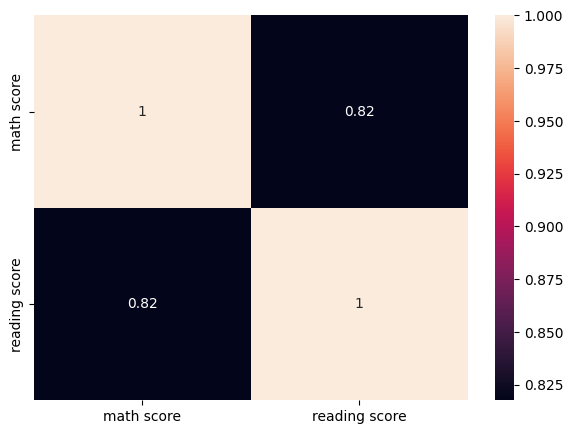

In [40]:
# Plotting the Correlation Matrix
sns.heatmap(df.corr(), annot=True)

In [41]:
# Get only the most correlated features for doing the Clustering Algorithm soon
df = df[['reading score', 'math score']]

In [42]:
df.head(10)

,reading score,math score
0,72,72
1,90,69
2,95,90
3,57,47
4,78,76
5,83,71
6,95,88
7,43,40
8,64,64
9,60,38


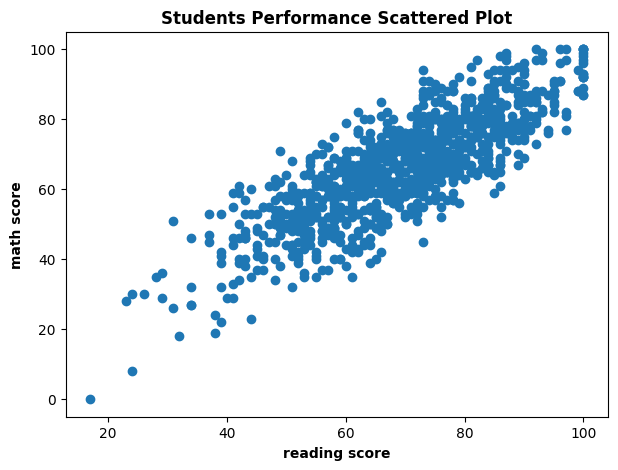

In [43]:
# Plotting the Visualized Scattered Data
plt.scatter(df['reading score'], df['math score'])
plt.title('Students Performance Scattered Plot', fontdict={'weight':'bold'})
plt.xlabel('reading score', fontdict={'weight':'bold'})
plt.ylabel('math score', fontdict={'weight':'bold'})
plt.show()

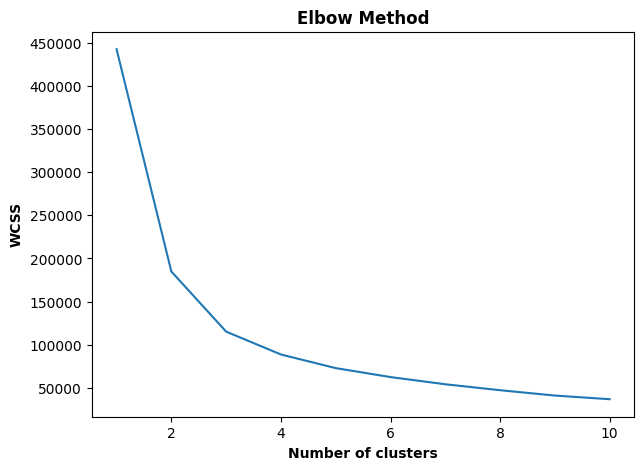

In [44]:
# Elbow Method (Find the best K value)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontdict={'weight':'bold'})
plt.xlabel('Number of clusters', fontdict={'weight':'bold'})
plt.ylabel('WCSS', fontdict={'weight':'bold'})
plt.show()

In [45]:
# Fitting the K-Means model with 3 clusters because 3 clusters is the best for this dataset based on the Elbow Method
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y_kmeans = kmeans.fit_predict(df)

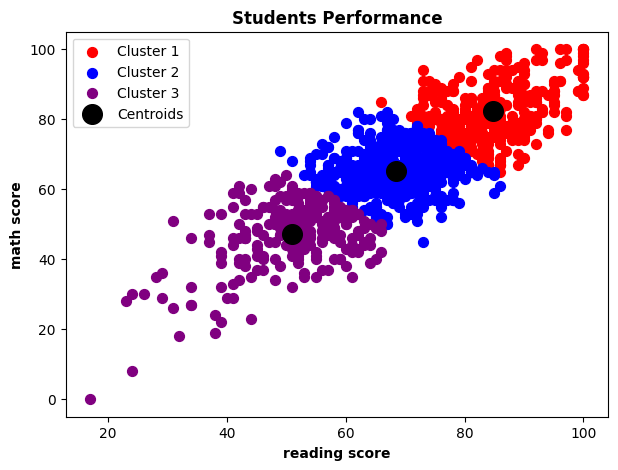

In [48]:
# Plotting the Clusters and its Centroids
plt.scatter(df[Y_kmeans == 0]['reading score'], df[Y_kmeans == 0]['math score'], s=50, c='red', label='Cluster 1')
plt.scatter(df[Y_kmeans == 1]['reading score'], df[Y_kmeans == 1]['math score'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[Y_kmeans == 2]['reading score'], df[Y_kmeans == 2]['math score'], s=50, c='purple', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Students Performance', fontdict={'weight':'bold'})
plt.xlabel('reading score', fontdict={'weight':'bold'})
plt.ylabel('math score', fontdict={'weight':'bold'})
plt.legend()
plt.show()

In [49]:
# Add new column which name is Cluster to the data
df['Cluster'] = Y_kmeans

In [50]:
df.head(10)

,reading score,math score,Cluster
0,72,72,1
1,90,69,0
2,95,90,0
3,57,47,2
4,78,76,0
5,83,71,0
6,95,88,0
7,43,40,2
8,64,64,1
9,60,38,2


In [51]:
# Showing the data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [52]:
# Showing unique values / data in the Cluster column
df['Cluster'].unique()

array([1, 0, 2])

In [53]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))